In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
# from collections import Counter
# from sklearn.model_selection import KFold, StratifiedKFold

import random
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Importing the dataset
train_data = pd.read_csv("train_file.csv")
train_data.head()

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
train_data.shape

(85895, 32)

In [4]:
# Importing the dataset
test_data = pd.read_csv("test_file.csv")
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [5]:
test_data.shape

(57239, 31)

In [6]:
# Check for any other unusable (NaN) values
print(pd.isnull(train_data).sum())

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [7]:
# Check for any other unusable (NaN) values
print(pd.isnull(test_data).sum())

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [8]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [9]:
my_submission['ID'].count()

57239

In [10]:
my_submission.shape

(57239, 1)

In [11]:
train_data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'], dtype='object')

In [12]:
# Studying the target variable
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

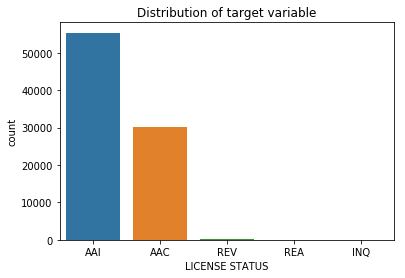

In [13]:
plt.title('Distribution of target variable')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()

In [14]:
# Identifying the unique number of values in the dataset
train_data.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [15]:
# Dropping columns which will be of no use for our model

train_data = train_data.drop(['LICENSE ID'], axis = 1)
test_data = test_data.drop(['LICENSE ID'], axis = 1)

train_data = train_data.drop(['ID'], axis = 1)
test_data = test_data.drop(['ID'], axis = 1)

train_data = train_data.drop(['ADDRESS'], axis = 1)
test_data = test_data.drop(['ADDRESS'], axis = 1)

train_data = train_data.drop(['STATE'], axis = 1)
test_data = test_data.drop(['STATE'], axis = 1)

train_data = train_data.drop(['LICENSE NUMBER'], axis = 1)
test_data = test_data.drop(['LICENSE NUMBER'], axis = 1)

train_data = train_data.drop(['APPLICATION CREATED DATE'], axis = 1)
test_data = test_data.drop(['APPLICATION CREATED DATE'], axis = 1)

train_data = train_data.drop(['LOCATION'], axis = 1)
test_data = test_data.drop(['LOCATION'], axis = 1)

train_data = train_data.drop(['LICENSE STATUS CHANGE DATE'], axis = 1)
test_data = test_data.drop(['LICENSE STATUS CHANGE DATE'], axis = 1)

train_data = train_data.drop(['WARD PRECINCT'], axis = 1)
test_data = test_data.drop(['WARD PRECINCT'], axis = 1)

train_data = train_data.drop(['LATITUDE'], axis = 1)
test_data = test_data.drop(['LATITUDE'], axis = 1)

train_data = train_data.drop(['LONGITUDE'], axis = 1)
test_data = test_data.drop(['LONGITUDE'], axis = 1)

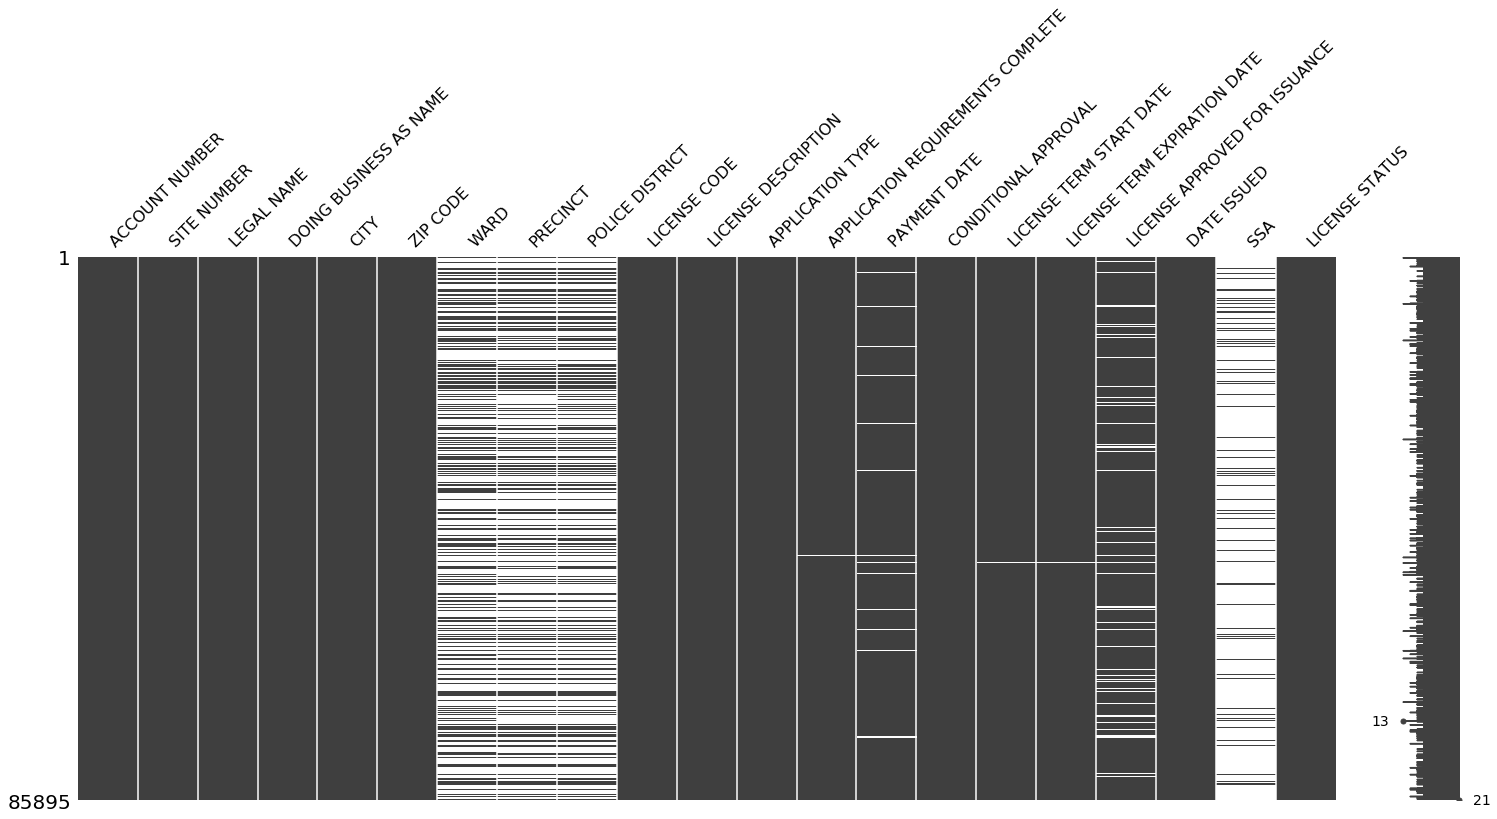

In [16]:
import missingno as msno
# Missing data in form of white lines 
msno.matrix(train_data)
plt.show()

In [17]:
train_data.isna().sum()

ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
CITY                                     0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
APPLICATION TYPE                         0
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TERM EXPIRATION DATE            18
LICENSE APPROVED FOR ISSUANCE         6789
DATE ISSUED                              0
SSA                                  76446
LICENSE STATUS                           0
dtype: int64

In [18]:
train_data.shape

(85895, 21)

In [19]:
train_data = train_data.dropna(thresh = 16)

In [20]:
train_data['LICENSE STATUS'].value_counts()

AAI    55150
AAC    29924
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [21]:
train_data['PAYMENT DATE'] = pd.to_datetime(train_data['PAYMENT DATE'])
train_data['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(train_data['APPLICATION REQUIREMENTS COMPLETE'])
train_data['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(train_data['LICENSE TERM EXPIRATION DATE'])
train_data['LICENSE TERM START DATE'] = pd.to_datetime(train_data['LICENSE TERM START DATE'])
train_data['DATE ISSUED'] = pd.to_datetime(train_data['DATE ISSUED'])
train_data['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(train_data['LICENSE APPROVED FOR ISSUANCE'])

In [22]:
test_data['PAYMENT DATE'] = pd.to_datetime(test_data['PAYMENT DATE'])
test_data['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(test_data['APPLICATION REQUIREMENTS COMPLETE'])
test_data['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(test_data['LICENSE TERM EXPIRATION DATE'])
test_data['LICENSE TERM START DATE'] = pd.to_datetime(test_data['LICENSE TERM START DATE'])
test_data['DATE ISSUED'] = pd.to_datetime(test_data['DATE ISSUED'])
test_data['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(test_data['LICENSE APPROVED FOR ISSUANCE'])

In [23]:
train_data['PAYMENT YEAR'] = train_data['PAYMENT DATE'].apply(lambda x: x.year)

In [24]:
test_data['PAYMENT YEAR'] = test_data['PAYMENT DATE'].apply(lambda x: x.year)

In [25]:
train_data = train_data.drop(['PAYMENT DATE'], axis = 1)

In [26]:
test_data = test_data.drop(['PAYMENT DATE'], axis = 1)

In [27]:
train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = train_data['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x: x.year)

In [28]:
test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = test_data['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x: x.year)

In [29]:
train_data = train_data.drop(['APPLICATION REQUIREMENTS COMPLETE'], axis = 1)

In [30]:
test_data = test_data.drop(['APPLICATION REQUIREMENTS COMPLETE'], axis = 1)

In [31]:
train_data['DATE ISSUED YEAR'] = train_data['DATE ISSUED'].apply(lambda x: x.year)

In [32]:
test_data['DATE ISSUED YEAR'] = test_data['DATE ISSUED'].apply(lambda x: x.year)

In [33]:
train_data = train_data.drop(['DATE ISSUED'], axis = 1)

In [34]:
test_data = test_data.drop(['DATE ISSUED'], axis = 1)

In [35]:
train_data['LICENSE TERM EXPIRATION YEAR'] = train_data['LICENSE TERM EXPIRATION DATE'].apply(lambda x: x.year)
train_data['LICENSE TERM START YEAR'] = train_data['LICENSE TERM START DATE'].apply(lambda x: x.year)

In [36]:
test_data['LICENSE TERM EXPIRATION YEAR'] = test_data['LICENSE TERM EXPIRATION DATE'].apply(lambda x: x.year)
test_data['LICENSE TERM START YEAR'] = test_data['LICENSE TERM START DATE'].apply(lambda x: x.year)

In [37]:
train_data['LICENSE TERM EXPIRATION YEAR'] = train_data['LICENSE TERM EXPIRATION YEAR'].fillna(round(train_data['LICENSE TERM EXPIRATION YEAR'].mean()))

In [38]:
test_data['LICENSE TERM EXPIRATION YEAR'] = test_data['LICENSE TERM EXPIRATION YEAR'].fillna(round(test_data['LICENSE TERM EXPIRATION YEAR'].mean()))

In [39]:
train_data['LICENSE TERM START YEAR'] = train_data['LICENSE TERM START YEAR'].fillna(round(train_data['LICENSE TERM START YEAR'].mean()))

In [40]:
test_data['LICENSE TERM START YEAR'] = test_data['LICENSE TERM START YEAR'].fillna(round(test_data['LICENSE TERM START YEAR'].mean()))

In [41]:
train_data['LICENSE VALIDITY'] = abs(train_data['LICENSE TERM EXPIRATION YEAR'] - train_data['LICENSE TERM START YEAR'])

In [42]:
test_data['LICENSE VALIDITY'] = abs(test_data['LICENSE TERM EXPIRATION YEAR'] - test_data['LICENSE TERM START YEAR'])

In [43]:
train_data = train_data.drop(['LICENSE TERM EXPIRATION DATE'], axis = 1)
train_data = train_data.drop(['LICENSE TERM EXPIRATION YEAR'], axis = 1)

In [44]:
test_data = test_data.drop(['LICENSE TERM EXPIRATION DATE'], axis = 1)
test_data = test_data.drop(['LICENSE TERM EXPIRATION YEAR'], axis = 1)

In [45]:
train_data = train_data.drop(['LICENSE TERM START DATE'], axis = 1)
train_data = train_data.drop(['LICENSE TERM START YEAR'], axis = 1)

In [46]:
test_data = test_data.drop(['LICENSE TERM START DATE'], axis = 1)
test_data = test_data.drop(['LICENSE TERM START YEAR'], axis = 1)

In [47]:
train_data['LICENSE APPROVED YEAR'] = train_data['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x: x.year)

In [48]:
test_data['LICENSE APPROVED YEAR'] = test_data['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x: x.year)

In [49]:
train_data = train_data.drop(['LICENSE APPROVED FOR ISSUANCE'], axis = 1)

In [50]:
test_data = test_data.drop(['LICENSE APPROVED FOR ISSUANCE'], axis = 1)

In [51]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0


In [52]:
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].fillna('None')
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].fillna('None')

In [53]:
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].fillna('None')
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].fillna('None')

In [54]:
train_data['LEGAL NAME'].apply(lambda x: x.upper())
train_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0


In [55]:
test_data['LEGAL NAME'].apply(lambda x: x.upper())
test_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0
3,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN
4,283018,3,MARINCA A. COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0


In [56]:
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace('.', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [57]:
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace('.', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [58]:
train_data['LEGAL TYPE'] = 'PVT'
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,PVT
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,PVT
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,PVT
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [59]:
test_data['LEGAL TYPE'] = 'PVT'
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,PVT
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,PVT
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,PVT
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,PVT


In [60]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,PVT
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [61]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,PVT
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,PVT
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,INC


In [62]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,PVT
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [63]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,LLC
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,LLC
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,INC


In [64]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,CORP
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [65]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,LLC
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,CORP
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,CORP


In [66]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,CORP
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [67]:
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,60610.0,42.0,67.0,18.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,LLC
1,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,60636.0,16.0,5.0,7.0,1010,Limited Business License,RENEW,N,NaN,2012.0,2011.0,2012,2.0,2012.0,INC
2,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,60605.0,4.0,8.0,1.0,1020,Residential Real Estate Developer,RENEW,N,NaN,2004.0,2004.0,2004,1.0,2004.0,CORP
3,335243,1,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,60827.0,9.0,33.0,5.0,1607,"Peddler, non-food, special",RENEW,N,NaN,2010.0,2010.0,2010,2.0,NaN,PVT
4,283018,3,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,60632.0,15.0,26.0,9.0,1010,Limited Business License,RENEW,N,39.0,2007.0,2007.0,2007,2.0,2007.0,CORP


In [68]:
train_data['LEGAL TYPE'].value_counts()

CORP    27670
PVT     26673
INC     24378
LLC      5040
LTD      1608
Name: LEGAL TYPE, dtype: int64

In [69]:
train_data = train_data.drop(['LEGAL NAME'], axis = 1)
train_data = train_data.drop(['DOING BUSINESS AS NAME'], axis = 1)

In [70]:
test_data = test_data.drop(['LEGAL NAME'], axis = 1)
test_data = test_data.drop(['DOING BUSINESS AS NAME'], axis = 1)

In [71]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,CHICAGO,60623.0,22.0,28.0,10.0,1010,Limited Business License,RENEW,N,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,PVT
1,262311,29,CHICAGO,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,RENEW,N,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,INC
2,345008,1,HIGHLAND,60035,NaN,NaN,NaN,1011,Home Repair,ISSUE,N,NaN,AAI,2009.0,2009.0,2009,2.0,2009.0,INC
3,273121,1,LEMONT,60439,NaN,NaN,NaN,1010,Limited Business License,ISSUE,N,NaN,AAI,2004.0,2004.0,2004,1.0,2004.0,CORP
4,213785,1,WAUKEGAN,60087,NaN,NaN,NaN,1010,Limited Business License,RENEW,N,NaN,AAI,2008.0,2008.0,2008,2.0,2008.0,PVT


In [72]:
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                                        49944
Home Repair                                                     10587
Peddler                                                          3568
Home Occupation                                                  2809
Retail Food Establishment                                        2321
Massage Therapist                                                1946
Street Performer                                                 1806
Scavenger, Private                                               1537
Motor Vehicle Repair                                             1534
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Automatic Amusement Device Operator                               771
Day Care Center                                                   522
Mobile Food Dispenser                                             510
Manufacturing Establ

In [73]:
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License                                        28094
Retail Food Establishment                                        4788
Home Occupation                                                  3021
Tobacco                                                          2426
Home Repair                                                      1860
Motor Vehicle Repair                                             1746
Peddler                                                          1208
Consumption on Premises - Incidental Activity                    1207
Hazardous Materials                                              1120
Regulated Business License                                       1089
Day Care Center                                                   730
Manufacturing Establishments                                      639
Massage Therapist                                                 569
Broker                                                            498
Residential Real Est

In [74]:
train_data['APPLICATION TYPE'].value_counts()

RENEW     60699
ISSUE     23264
C_LOC      1394
C_CAPA        7
C_EXPA        5
Name: APPLICATION TYPE, dtype: int64

In [75]:
train_data['CONDITIONAL APPROVAL'].value_counts()

N    85351
Y       18
Name: CONDITIONAL APPROVAL, dtype: int64

In [76]:
train_data.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
CITY                                          0
ZIP CODE                                     31
WARD                                      49180
PRECINCT                                  56175
POLICE DISTRICT                           53486
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                       75921
LICENSE STATUS                                0
PAYMENT YEAR                                839
APPLICATION REQUIREMENTS COMPLETE YEAR      149
DATE ISSUED YEAR                              0
LICENSE VALIDITY                              0
LICENSE APPROVED YEAR                      6271
LEGAL TYPE                                    0
dtype: int64

In [77]:
train_data.dtypes

ACCOUNT NUMBER                              int64
SITE NUMBER                                 int64
CITY                                       object
ZIP CODE                                   object
WARD                                      float64
PRECINCT                                  float64
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                        object
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
SSA                                       float64
LICENSE STATUS                             object
PAYMENT YEAR                              float64
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
DATE ISSUED YEAR                            int64
LICENSE VALIDITY                          float64
LICENSE APPROVED YEAR                     float64
LEGAL TYPE                                 object
dtype: object

In [78]:
train_data['ZIP CODE'] = train_data['ZIP CODE'].fillna('None')
test_data['ZIP CODE'] = test_data['ZIP CODE'].fillna('None')

In [79]:
# train_data['WARD'] = train_data['WARD'].fillna(random.randint(1,47))
# test_data['WARD'] = test_data['WARD'].fillna(random.randint(1,47))
train_data['WARD'] = train_data['WARD'].fillna(0)
test_data['WARD'] = test_data['WARD'].fillna(0)

In [80]:
# train_data['PRECINCT'] = train_data['PRECINCT'].fillna(random.randint(1,76))
# test_data['PRECINCT'] = test_data['PRECINCT'].fillna(random.randint(1,76))
train_data['PRECINCT'] = train_data['PRECINCT'].fillna(0)
test_data['PRECINCT'] = test_data['PRECINCT'].fillna(0)

In [81]:
# train_data['POLICE DISTRICT'] = train_data['POLICE DISTRICT'].fillna(random.randint(1,25))
# test_data['POLICE DISTRICT'] = test_data['POLICE DISTRICT'].fillna(random.randint(1,25))
train_data['POLICE DISTRICT'] = train_data['POLICE DISTRICT'].fillna(0)
test_data['POLICE DISTRICT'] = test_data['POLICE DISTRICT'].fillna(0)

In [82]:
# train_data['SSA'] = train_data['SSA'].fillna(random.randint(1,69))
# test_data['SSA'] = test_data['SSA'].fillna(random.randint(1,69))
train_data['SSA'] = train_data['SSA'].fillna(0)
test_data['SSA'] = test_data['SSA'].fillna(0)

In [83]:
train_data['PAYMENT YEAR'] = train_data['PAYMENT YEAR'].fillna(round(train_data['PAYMENT YEAR'].mean()))
test_data['PAYMENT YEAR'] = test_data['PAYMENT YEAR'].fillna(round(test_data['PAYMENT YEAR'].mean()))

In [84]:
train_data['LICENSE APPROVED YEAR'] = train_data['LICENSE APPROVED YEAR'].fillna(round(train_data['LICENSE APPROVED YEAR'].mean()))
test_data['LICENSE APPROVED YEAR'] = test_data['LICENSE APPROVED YEAR'].fillna(round(test_data['LICENSE APPROVED YEAR'].mean()))

In [85]:
train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(train_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean()))
test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'] = test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(test_data['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean()))

In [86]:
train_data.isna().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
SSA                                       0
LICENSE STATUS                            0
PAYMENT YEAR                              0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
DATE ISSUED YEAR                          0
LICENSE VALIDITY                          0
LICENSE APPROVED YEAR                     0
LEGAL TYPE                                0
dtype: int64

In [87]:
test_data.isna().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
SSA                                       0
PAYMENT YEAR                              0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
DATE ISSUED YEAR                          0
LICENSE VALIDITY                          0
LICENSE APPROVED YEAR                     0
LEGAL TYPE                                0
dtype: int64

In [88]:
train_data.shape

(85369, 19)

In [89]:
test_data.shape

(57239, 18)

In [90]:
train_data.columns

Index(['ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'ZIP CODE', 'WARD', 'PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'APPLICATION TYPE', 'CONDITIONAL APPROVAL', 'SSA', 'LICENSE STATUS', 'PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'DATE ISSUED YEAR', 'LICENSE VALIDITY', 'LICENSE APPROVED YEAR', 'LEGAL TYPE'], dtype='object')

In [91]:
train_data.dtypes

ACCOUNT NUMBER                              int64
SITE NUMBER                                 int64
CITY                                       object
ZIP CODE                                   object
WARD                                      float64
PRECINCT                                  float64
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                        object
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
SSA                                       float64
LICENSE STATUS                             object
PAYMENT YEAR                              float64
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
DATE ISSUED YEAR                            int64
LICENSE VALIDITY                          float64
LICENSE APPROVED YEAR                     float64
LEGAL TYPE                                 object
dtype: object

In [92]:
encoder = LabelEncoder()
train_data["CITY"] = encoder.fit_transform(train_data["CITY"])
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
train_data["LICENSE DESCRIPTION"] = encoder.fit_transform(train_data["LICENSE DESCRIPTION"])
train_data["APPLICATION TYPE"] = encoder.fit_transform(train_data["APPLICATION TYPE"])
train_data["CONDITIONAL APPROVAL"] = encoder.fit_transform(train_data["CONDITIONAL APPROVAL"])
# train_data["LICENSE STATUS"] = encoder.fit_transform(train_data["LICENSE STATUS"])
train_data["LEGAL TYPE"] = encoder.fit_transform(train_data["LEGAL TYPE"])
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,193,1551,22.0,28.0,10.0,1010,40,4,0,25.0,AAI,2002.0,2002.0,2006,1.0,2002.0,4
1,262311,29,193,1540,33.0,23.0,17.0,1315,45,4,0,60.0,AAC,2005.0,2005.0,2006,1.0,2006.0,1
2,345008,1,465,1017,0.0,0.0,0.0,1011,29,3,0,0.0,AAI,2009.0,2009.0,2009,2.0,2009.0,1
3,273121,1,584,1321,0.0,0.0,0.0,1010,40,3,0,0.0,AAI,2004.0,2004.0,2004,1.0,2004.0,0
4,213785,1,1142,1087,0.0,0.0,0.0,1010,40,4,0,0.0,AAI,2008.0,2008.0,2008,2.0,2008.0,4


In [93]:
train_data["LICENSE STATUS"].value_counts()

AAI    55150
AAC    29924
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [94]:
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REV', 2)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REA', 3)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('INQ', 4)

In [95]:
encoder = LabelEncoder()
test_data["CITY"] = encoder.fit_transform(test_data["CITY"])
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))
test_data["LICENSE DESCRIPTION"] = encoder.fit_transform(test_data["LICENSE DESCRIPTION"])
test_data["APPLICATION TYPE"] = encoder.fit_transform(test_data["APPLICATION TYPE"])
test_data["CONDITIONAL APPROVAL"] = encoder.fit_transform(test_data["CONDITIONAL APPROVAL"])
test_data["LEGAL TYPE"] = encoder.fit_transform(test_data["LEGAL TYPE"])
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,280120,1,59,255,42.0,67.0,18.0,1020,82,5,0,0.0,2012.0,2011.0,2012,2.0,2012.0,2
1,65043,1,59,280,16.0,5.0,7.0,1010,48,5,0,0.0,2012.0,2011.0,2012,2.0,2012.0,1
2,281270,1,59,250,4.0,8.0,1.0,1020,82,5,0,0.0,2004.0,2004.0,2004,1.0,2004.0,0
3,335243,1,59,311,9.0,33.0,5.0,1607,70,5,0,0.0,2010.0,2010.0,2010,2.0,2008.0,4
4,283018,3,59,276,15.0,26.0,9.0,1010,48,5,0,39.0,2007.0,2007.0,2007,2.0,2007.0,0


In [96]:
# Finding out the correlation between the features
corr = train_data.corr()
corr.shape

(19, 19)

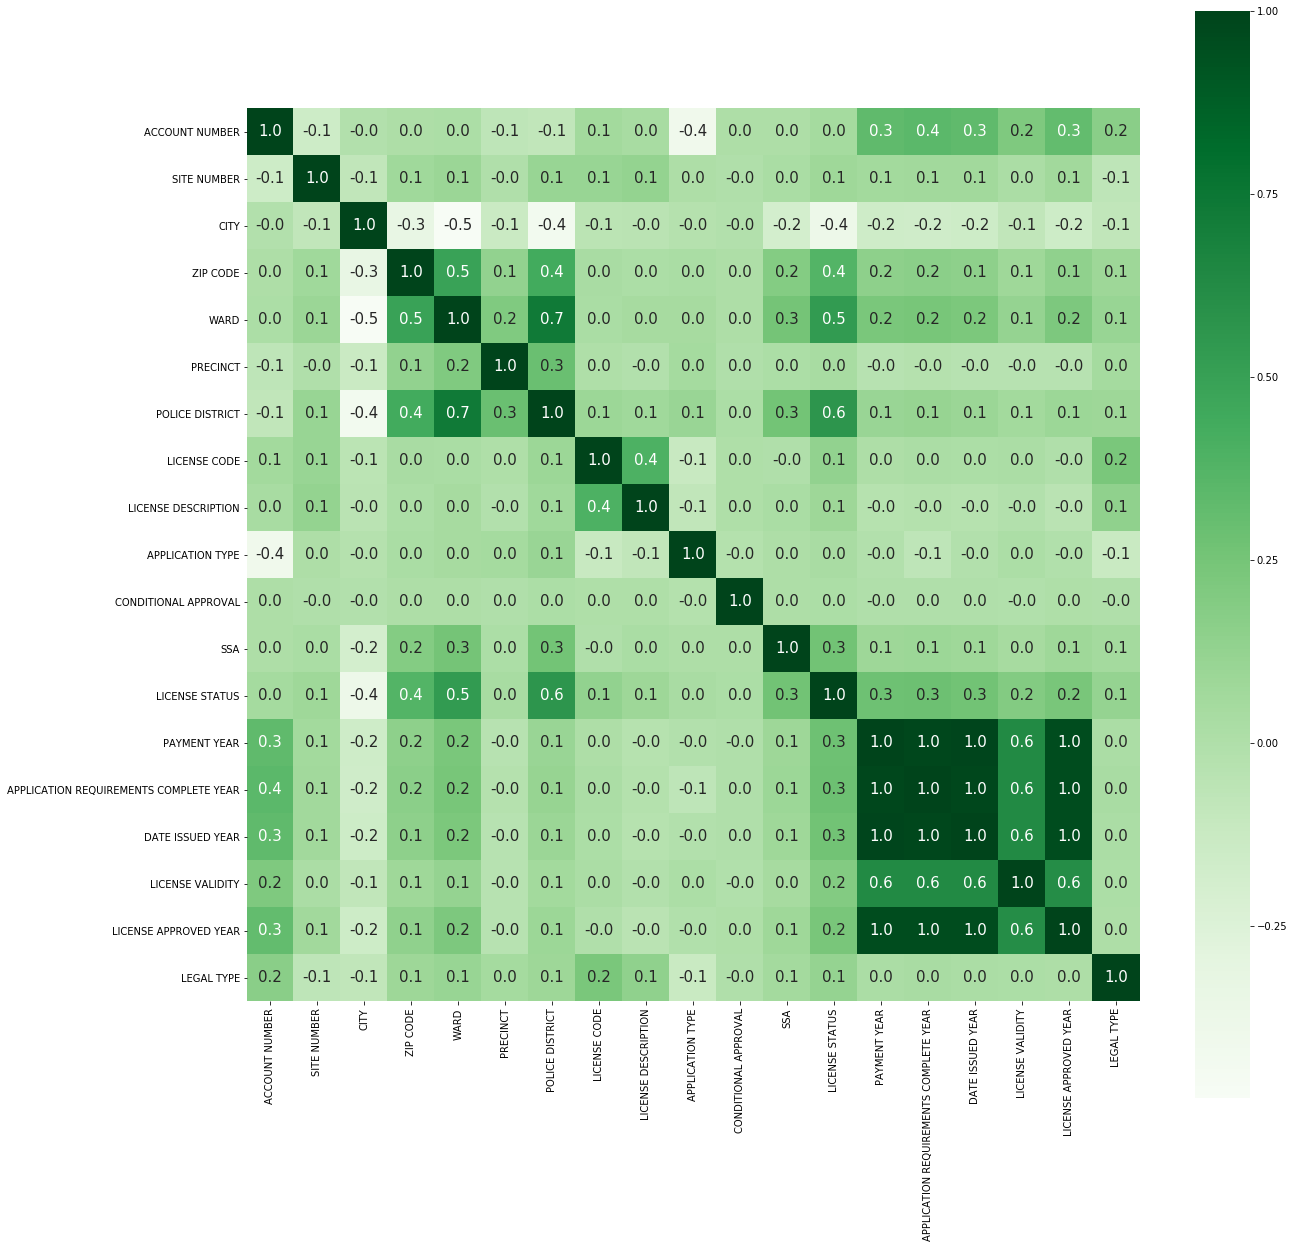

In [97]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [98]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
0,32811,1,193,1551,22.0,28.0,10.0,1010,40,4,0,25.0,0,2002.0,2002.0,2006,1.0,2002.0,4
1,262311,29,193,1540,33.0,23.0,17.0,1315,45,4,0,60.0,1,2005.0,2005.0,2006,1.0,2006.0,1
2,345008,1,465,1017,0.0,0.0,0.0,1011,29,3,0,0.0,0,2009.0,2009.0,2009,2.0,2009.0,1
3,273121,1,584,1321,0.0,0.0,0.0,1010,40,3,0,0.0,0,2004.0,2004.0,2004,1.0,2004.0,0
4,213785,1,1142,1087,0.0,0.0,0.0,1010,40,4,0,0.0,0,2008.0,2008.0,2008,2.0,2008.0,4


In [99]:
# Spliting target variable and independent variables
X = train_data.drop(['LICENSE STATUS'], axis = 1)
y = train_data['LICENSE STATUS']

In [100]:
sss = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [101]:
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 7839  7893  7970 ... 85366 85367 85368] Test: [    0     1     2 ...  8542  8543 50435]
Train: [    0     1     2 ... 85366 85367 85368] Test: [ 7839  7893  7970 ... 17124 59170 79658]
Train: [    0     1     2 ... 85366 85367 85368] Test: [16517 16819 16982 ... 25750 25752 81811]
Train: [    0     1     2 ... 85366 85367 85368] Test: [25522 25523 25524 ... 34451 34452 34457]
Train: [    0     1     2 ... 85366 85367 85368] Test: [33990 33991 33997 ... 42746 42748 42750]
Train: [    0     1     2 ... 85366 85367 85368] Test: [41746 41748 41983 ... 51255 51257 51259]
Train: [    0     1     2 ... 85366 85367 85368] Test: [49408 49893 50810 ... 59788 59792 59794]
Train: [    0     1     2 ... 85366 85367 85368] Test: [58845 59652 59669 ... 68331 68333 68334]
Train: [    0     1     2 ... 85366 85367 85368] Test: [68243 68274 68275 ... 76877 76878 76880]
Train: [    0     1     2 ... 76880 79658 81811] Test: [76178 76327 76336 ... 85366 85367 85368]


F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [102]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [103]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('Label Distributions:')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions:
[6.46011479e-01 3.50526466e-01 3.39697786e-03 3.90457225e-05
 2.60304817e-05]
[0.64608716 0.35051546 0.00339738]


In [104]:
train_data["LICENSE STATUS"].value_counts()

0    55150
1    29924
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [105]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train_data = train_data.sample(frac=1)

# Amount of fraud classes in proportion.
fraud_df = train_data.loc[train_data['LICENSE STATUS'] == 4]
pending_df = train_data.loc[train_data['LICENSE STATUS'] == 3]
accepted_df = train_data.loc[train_data['LICENSE STATUS'] == 2]

non_fraud_df = train_data.loc[train_data['LICENSE STATUS'] == 1][:600]
non_accepted_df = train_data.loc[train_data['LICENSE STATUS'] == 0][:1000]

normal_distributed_df = pd.concat([fraud_df, pending_df, accepted_df, non_fraud_df, non_accepted_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE,CONDITIONAL APPROVAL,SSA,LICENSE STATUS,PAYMENT YEAR,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE VALIDITY,LICENSE APPROVED YEAR,LEGAL TYPE
14592,248012,1,193,1541,30.0,999.0,17.0,1010,40,3,0,0.0,0,2002.0,2002.0,2002,1.0,2002.0,4
33657,285662,1,768,1050,0.0,0.0,0.0,1011,29,4,0,0.0,1,2005.0,2004.0,2005,1.0,2005.0,1
63780,68115,3,1010,636,0.0,0.0,0.0,1010,40,3,0,0.0,0,2012.0,2012.0,2012,2.0,2012.0,1
47446,297004,1,472,1440,0.0,0.0,0.0,1010,40,3,0,0.0,0,2006.0,2006.0,2006,1.0,2006.0,0
38426,317639,3,193,1583,31.0,37.0,16.0,1011,29,4,0,0.0,1,2012.0,2012.0,2012,2.0,2012.0,0


In [106]:
new_df['LICENSE STATUS'].value_counts()

0    1000
1     600
2     290
3       3
4       2
Name: LICENSE STATUS, dtype: int64

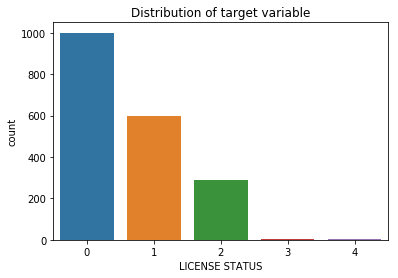

In [107]:
plt.title('Distribution of target variable')
sns.countplot(new_df['LICENSE STATUS'])
plt.show()

NameError: name 'ax1' is not defined

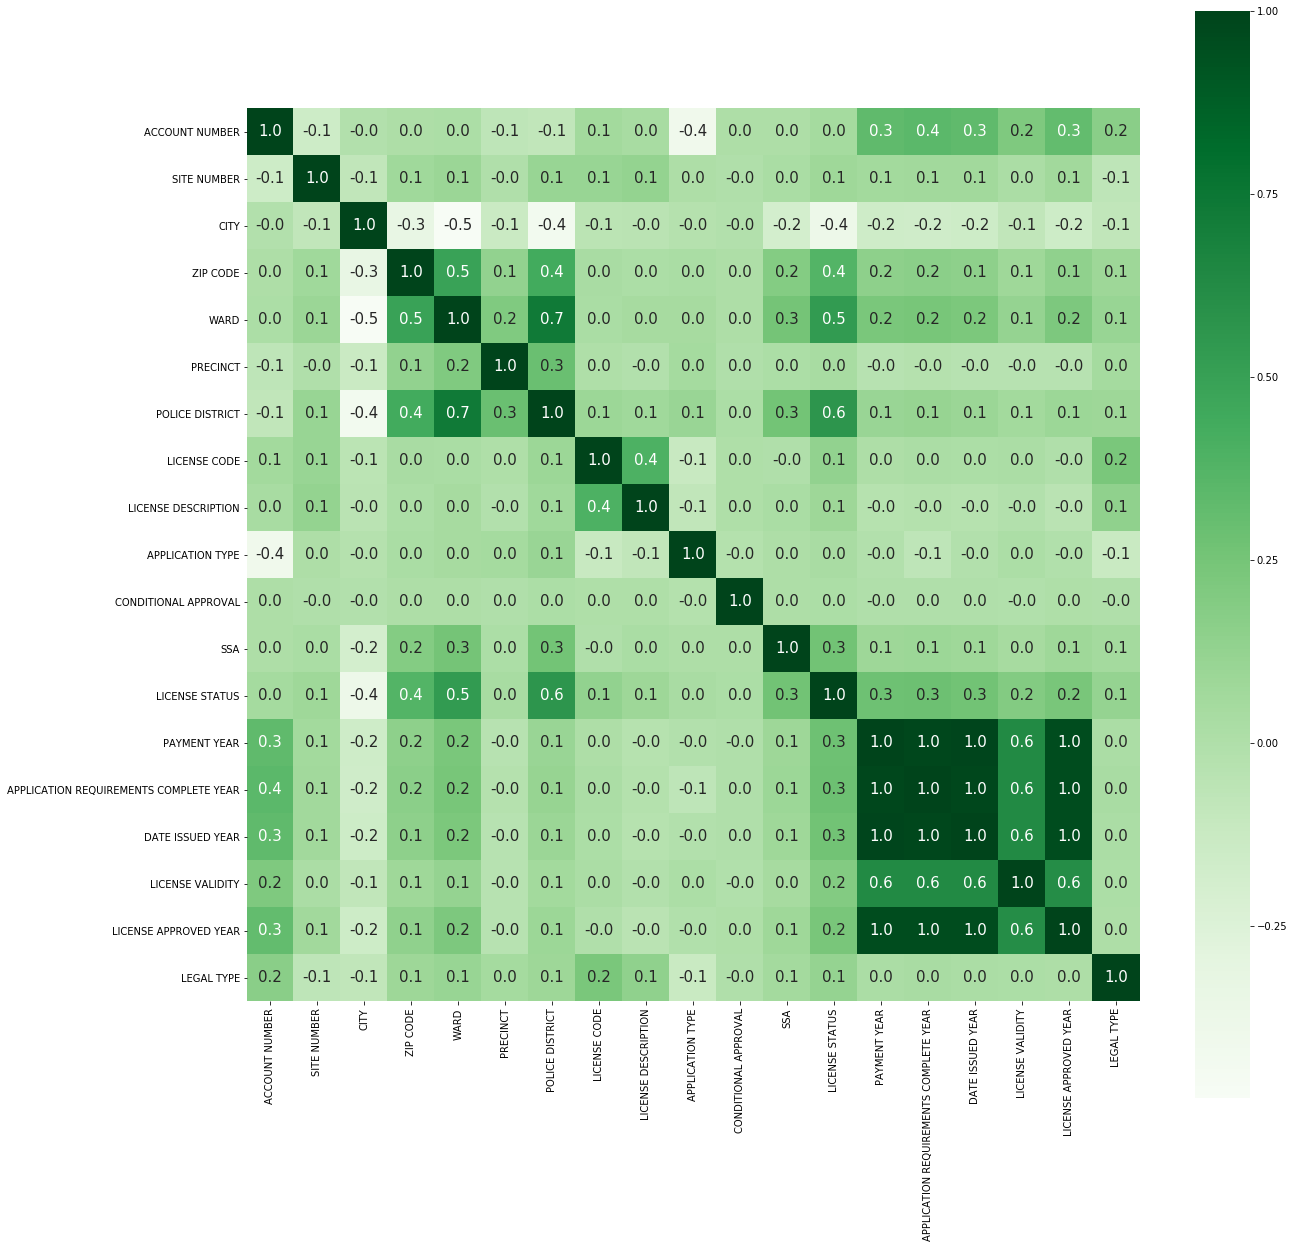

In [108]:
# Entire DataFrame
corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
plt.show()

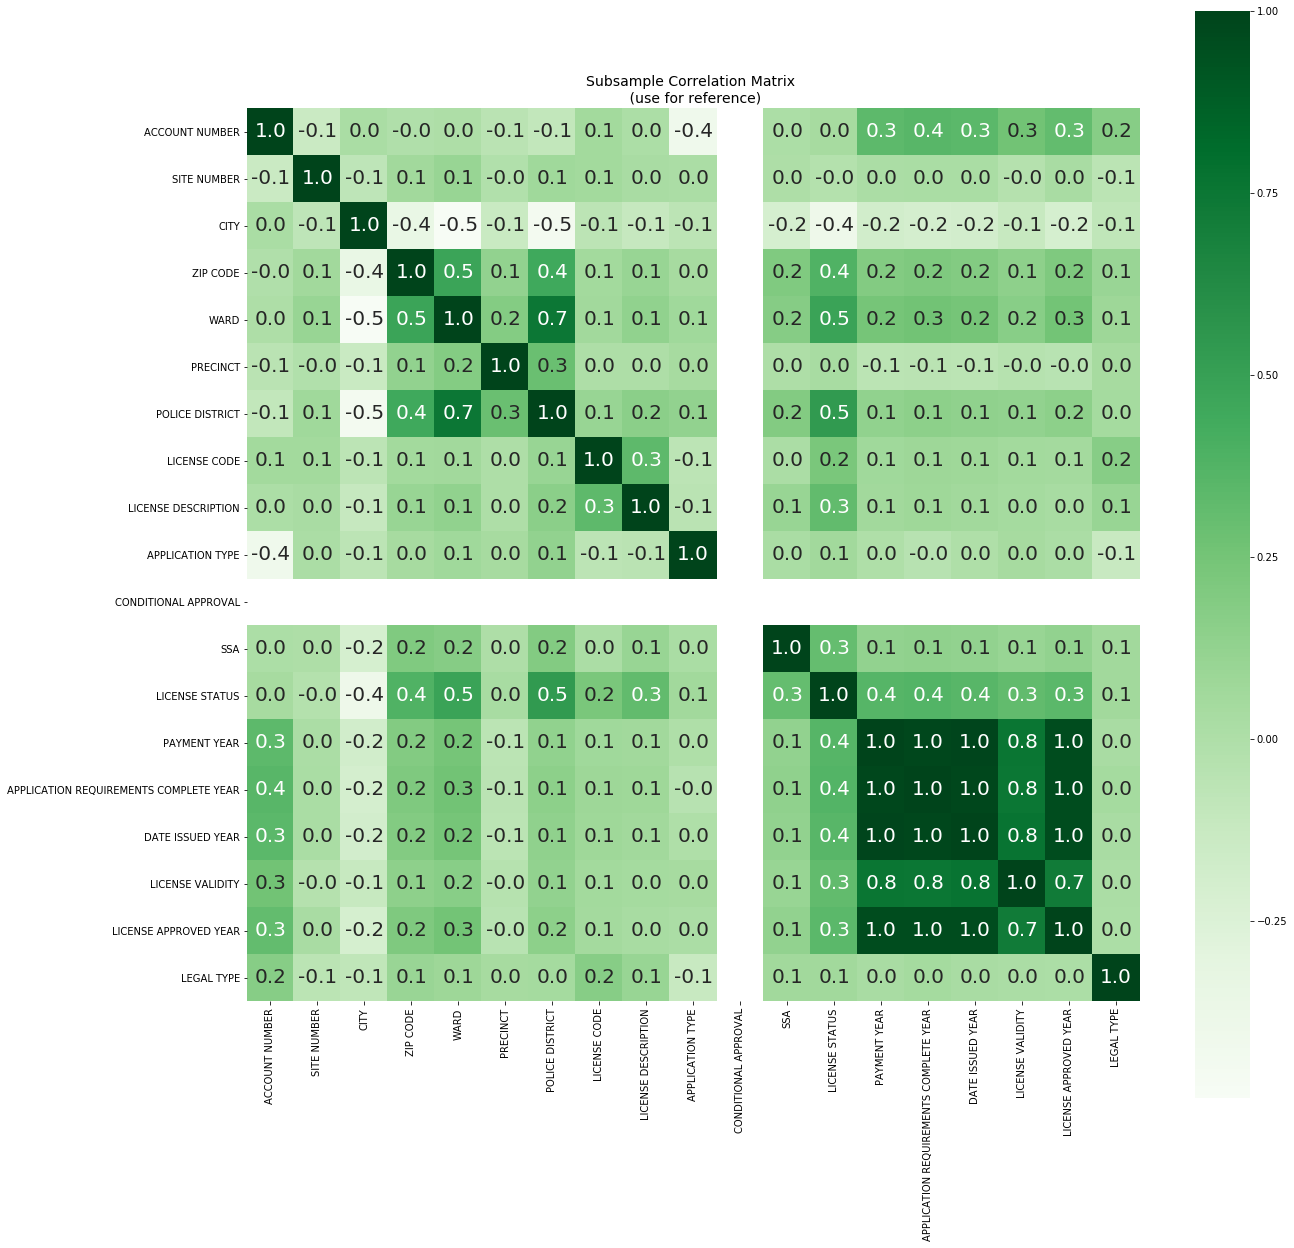

In [109]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [110]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('LICENSE STATUS', axis=1)
y = new_df['LICENSE STATUS']

In [111]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [112]:
# # Turn the values into an array for feeding the classification algorithms.
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

# Logistic Regression

In [113]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# Calculating cross validation score
training_score = cross_val_score(logreg, X_train, y_train, cv=10)

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Installed\Anaconda3\envs\

In [115]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [119]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )

Total Accuracy :  68.14


In [120]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

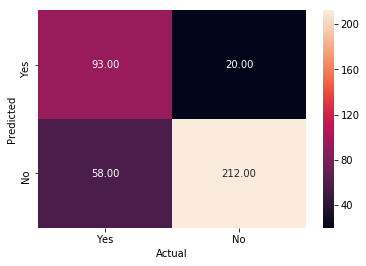

In [121]:
# Confusion matrix 
draw_cm(y_test, y_pred)

# Gaussian Naive Bayes

In [122]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Prediction on test set
y_pred = model.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )

Total Accuracy :  55.7


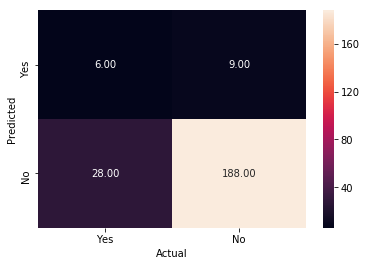

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

# Decision Tree Classifier

In [ ]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# # Hyperparameter Optimization
# parameters = [{'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10, 50], 
#               'min_samples_split': [2, 3, 50, 100],
#               'min_samples_leaf': [1, 5, 8, 10]
#              }
# # Run the grid search
# grid_obj = GridSearchCV(clf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [ ]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

In [ ]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [ ]:
# Confusion matrix
draw_cm(y_test, y_pred)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

# Random Forest Classifier

In [ ]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# # Hyperparameter Optimization
# parameters = {'n_estimators': [4, 6, 9, 10, 15], 
#               'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1, 5, 8]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(rf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

In [ ]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [ ]:
# Confusion metrix
draw_cm(y_test, y_pred)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )

# SVM Classifier

In [ ]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# # Hyperparameter Optimization
# parameters = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

# # Run the grid search
# grid_obj = GridSearchCV(svc, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the svc to the best combination of parameters
# svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

In [ ]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [ ]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )

# K - Nearest Neighbors

In [ ]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# # Hyperparameter Optimization
# parameters = {'n_neighbors': [3, 4, 5, 10], 
#               'weights': ['uniform', 'distance'],
#               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'leaf_size' : [10, 20, 30, 50]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(knn, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the knn to the best combination of parameters
# knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

In [ ]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [ ]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_knn )
print('Precision Score : ', precision_score(y_test, y_pred) )
print('Recall Score : ', recall_score(y_test, y_pred) )
print('F1 Score : ', f1_score(y_test, y_pred))

# XGBoost

In [ ]:
# eXtreme Gradient Boosting

# Import library of xgboost model
from xgboost import XGBClassifier

# Create a XGB Classifier
# gbm = XGBClassifier(learning_rate = 0.02, n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=1, subsample=0.8, 
#                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1)
gbm = XGBClassifier()

# Train the model using the training sets
gbm.fit(X_train, y_train)

In [ ]:
# Prediction on test data
y_pred = gbm.predict(X_test)

In [ ]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )
print('Precision Score : ', precision_score(y_test, y_pred) )
print('Recall Score : ', recall_score(y_test, y_pred) )
print('F1 Score : ', f1_score(y_test, y_pred))

In [ ]:
# Confusion matrix 
draw_cm(y_test, y_pred)

# Artificial Neural Network

In [ ]:
# Spliting target variable and independent variables
X = train_data.drop(['LICENSE STATUS'], axis = 1)
y = train_data['LICENSE STATUS']

In [ ]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0, stratify=y)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Importing the Keras libraries and packages
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initializing the CNN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(10, init = 'uniform', activation = 'relu', input_dim = 18))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 10, init = 'uniform', activation = 'relu'))

In [ ]:
# Adding the third hidden layer
classifier.add(Dense(units = 10, init = 'uniform', activation = 'relu'))

In [ ]:
# Adding the fourth hidden layer
classifier.add(Dense(units = 10, init = 'uniform', activation = 'relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1, init = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the training set
nn_history = classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 10, validation_data = (X_test, y_test))

In [ ]:
plt.plot(nn_history.history['acc'])
plt.plot(nn_history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
# Predicting the test set result
y_pred = classifier.predict(X_test)

In [ ]:
acc_ann = nn_history.history['acc']
acc_ann = max(acc_ann)*100
y_pred

# Evaluation and comparision of all the models

In [ ]:
# models = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
#               'K - Nearest Neighbors', 'XGBoost', 'Artificial Neural Networks'],
#     'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb, acc_ann]})
# models.sort_values(by='Score', ascending=False)

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb]})
models.sort_values(by='Score', ascending=False)

In [ ]:
# Predicting on the test dataset
train_data.head()

In [ ]:
test_data.head()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
my_pred = gbm.predict(test_data)

In [ ]:
my_pred.shape

In [ ]:
my_submission['LICENSE STATUS'] = my_pred

In [ ]:
my_submission.shape

In [ ]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'INQ')

In [ ]:
my_submission['LICENSE STATUS'].value_counts()

In [ ]:
# Saving predictions to file
# my_submission.to_csv('submission.csv', index=False)